In [23]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight') 
sb.set()

In [81]:
sample=pd.read_csv('newairbnb.csv')

In [82]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36744 entries, 0 to 36743
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      36744 non-null  int64  
 1   neighbourhood_group             36744 non-null  object 
 2   neighbourhood                   36744 non-null  object 
 3   latitude                        36744 non-null  float64
 4   longitude                       36744 non-null  float64
 5   room_type                       36744 non-null  object 
 6   price                           36744 non-null  int64  
 7   minimum_nights                  36744 non-null  int64  
 8   number_of_reviews               36744 non-null  int64  
 9   last_review                     36744 non-null  object 
 10  reviews_per_month               36744 non-null  float64
 11  calculated_host_listings_count  36744 non-null  int64  
 12  availability_365                

In [83]:
sample.drop('Unnamed: 0', axis=1, inplace=True)
sample['last_review'] = pd.to_datetime(sample['last_review'])

In [84]:
sample.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,distance_from_center,room_type_encoded,neighbourhood_group_encoded,booking_density,availability_ratio
count,36744.000000,36744.000000,36744.000000,36744.000000,36744.000000,36744,36744.000000,36744.000000,36744.000000,36744.000000,36744.000000,36744.000000,36744.000000,36744.000000
mean,40.727808,-73.949882,117.328543,5.877477,29.745673,2018-10-02 18:29:18.850424320,1.376961,4.850180,111.833578,7.655095,0.521228,0.777678,54.785254,0.306393
min,40.506410,-74.244420,0.000000,1.000000,1.000000,2011-03-28 00:00:00,0.010000,1.000000,0.000000,0.077637,0.000000,0.000000,0.000000,0.000000
25%,40.688050,-73.981390,65.000000,1.000000,3.000000,2018-07-02 00:00:00,0.190000,1.000000,0.000000,4.544123,0.000000,0.000000,0.000000,0.000000
50%,40.720770,-73.953720,100.000000,2.000000,10.000000,2019-05-19 00:00:00,0.710000,1.000000,50.000000,6.756982,0.000000,1.000000,10.766667,0.136986
75%,40.763320,-73.933250,150.000000,4.000000,34.000000,2019-06-23 00:00:00,2.020000,2.000000,220.000000,9.985185,1.000000,1.000000,76.000000,0.602740
max,40.913060,-73.712990,321.000000,1250.000000,629.000000,2019-07-08 00:00:00,58.500000,327.000000,365.000000,30.284027,2.000000,4.000000,365.000000,1.000000
std,0.055724,0.047015,65.051133,17.471648,48.723988,NaN,1.691261,24.437843,128.596956,4.553122,0.543246,0.866773,87.638104,0.352320


## Numerical data visualization

In [87]:
numerical_cols = sample[['price', 'minimum_nights', 'number_of_reviews',
                  'reviews_per_month', 'calculated_host_listings_count',
                  'availability_365', 'distance_from_center', 'booking_density', 'availability_ratio']]

In [88]:
numerical_cols.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,distance_from_center,booking_density,availability_ratio
count,36744.000000,36744.000000,36744.000000,36744.000000,36744.000000,36744.000000,36744.000000,36744.000000,36744.000000
mean,117.328543,5.877477,29.745673,1.376961,4.850180,111.833578,7.655095,54.785254,0.306393
std,65.051133,17.471648,48.723988,1.691261,24.437843,128.596956,4.553122,87.638104,0.352320
min,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.077637,0.000000,0.000000
25%,65.000000,1.000000,3.000000,0.190000,1.000000,0.000000,4.544123,0.000000,0.000000
50%,100.000000,2.000000,10.000000,0.710000,1.000000,50.000000,6.756982,10.766667,0.136986
75%,150.000000,4.000000,34.000000,2.020000,2.000000,220.000000,9.985185,76.000000,0.602740
max,321.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,30.284027,365.000000,1.000000


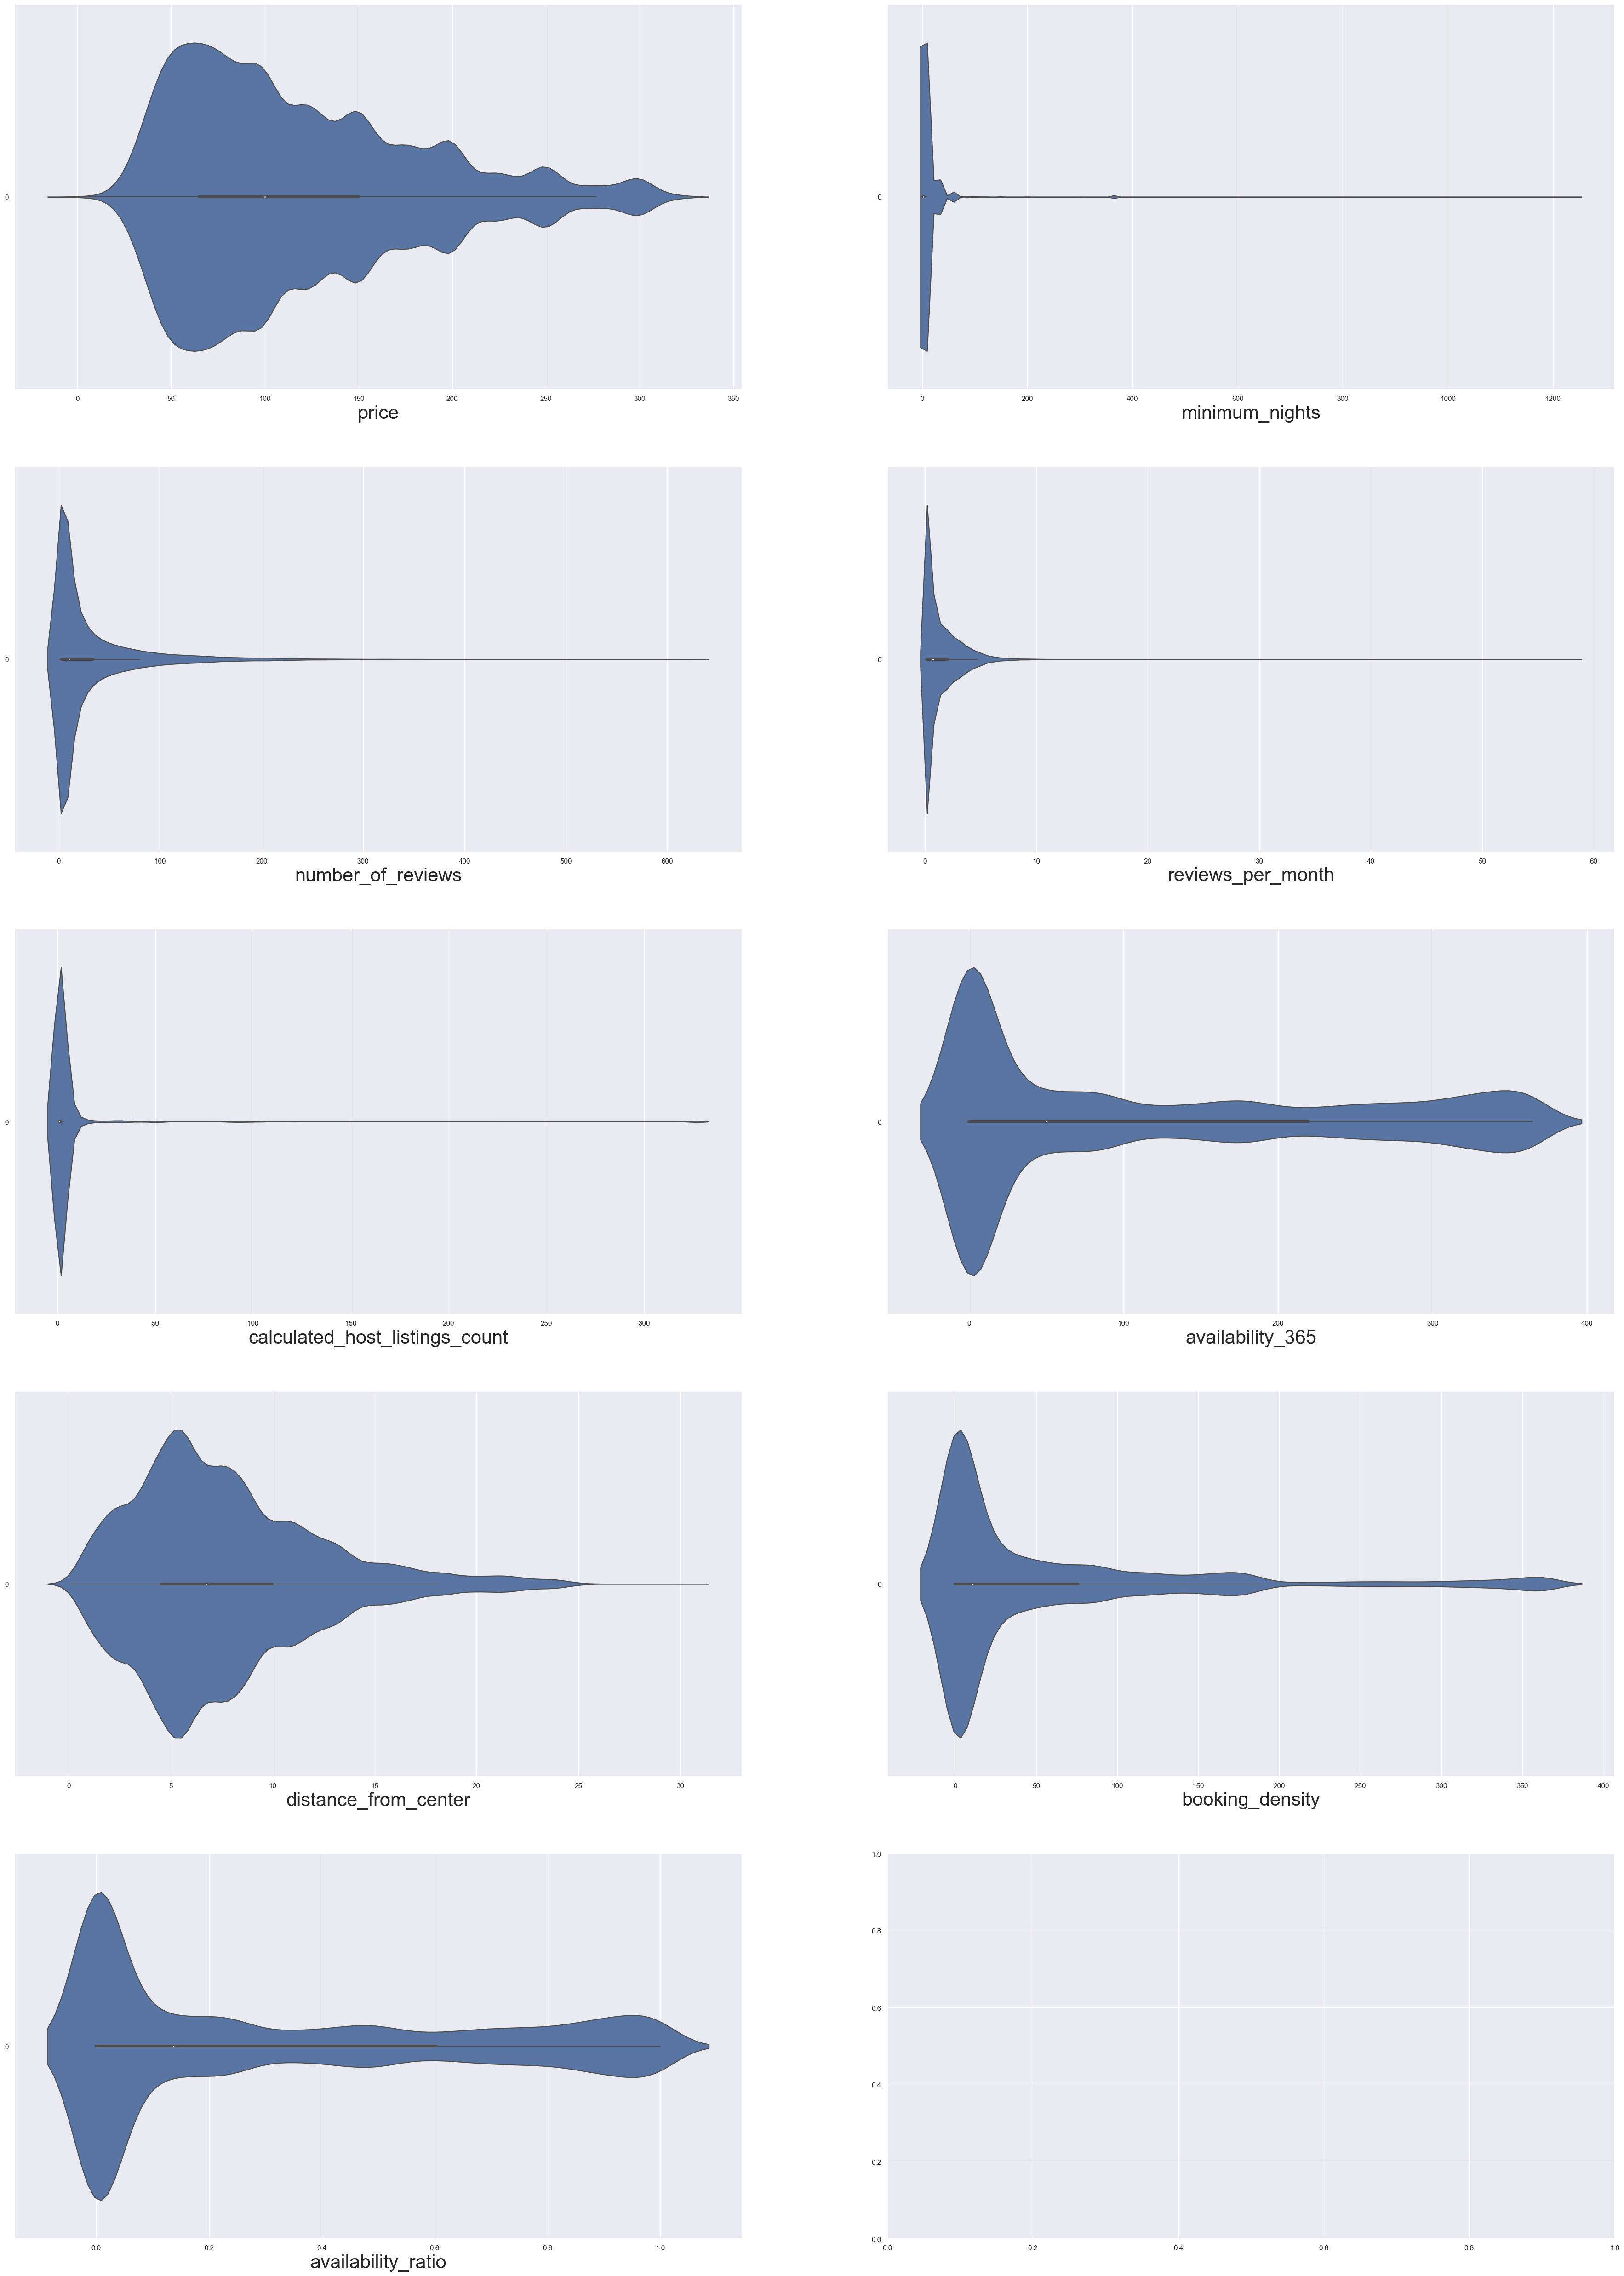

In [89]:
# Draw the distributions of all variables
f, axes = plt.subplots(5,2,figsize=(40,60))
count = 0
row = 0
numericaldata = [x for x in numerical_cols.columns if x != 'vote_average']
for var in numericaldata:
    if count % 2 == 0:
        col = 0
    else:
        col = 1
    sb.violinplot(data = numerical_cols[var], orient = "h", ax = axes[row,col])
    ax = axes[row,col]
    ax.set_xlabel(var,fontsize=30)
    count+=1
    if count %2 == 0:
        row+=1

<Axes: >

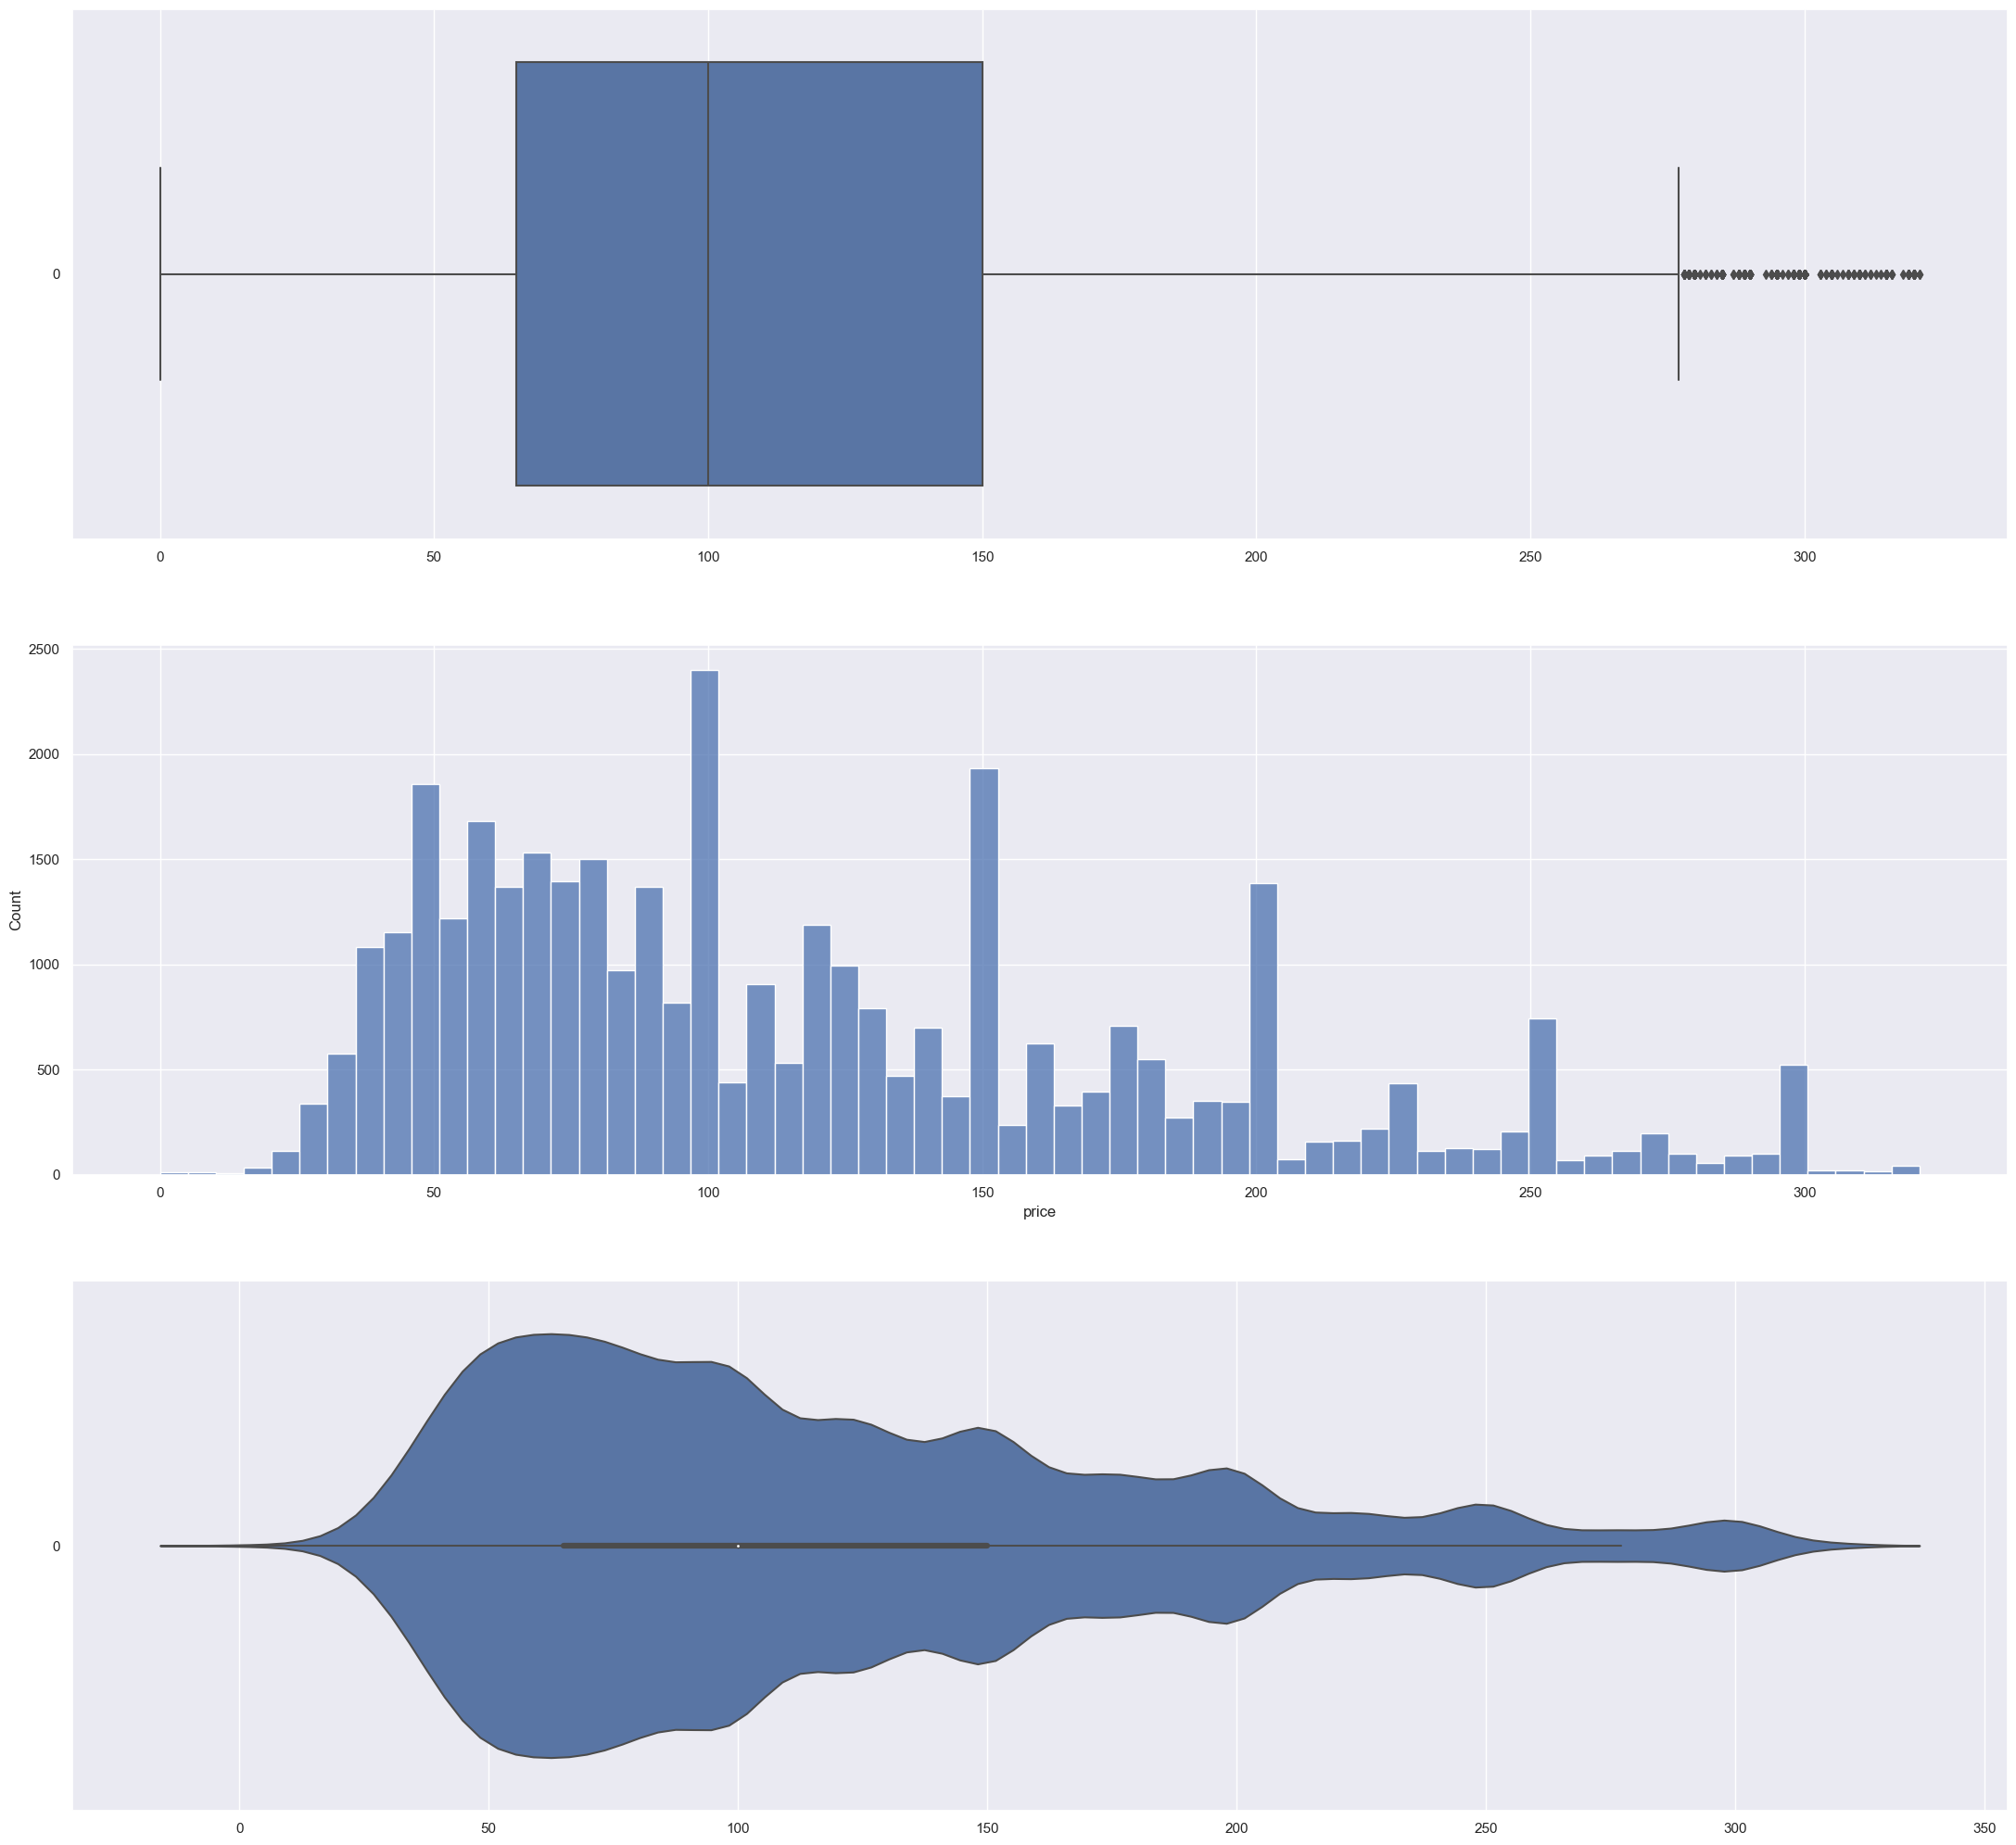

In [90]:
f, axes = plt.subplots(3,figsize=(24, 24))
sb.boxplot(data = numerical_cols["price"], orient = "h", ax = axes[0])
sb.histplot(data = numerical_cols["price"],ax = axes[1])
sb.violinplot(data = numerical_cols["price"], orient = "h", ax = axes[2])

C:\Users\khans\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


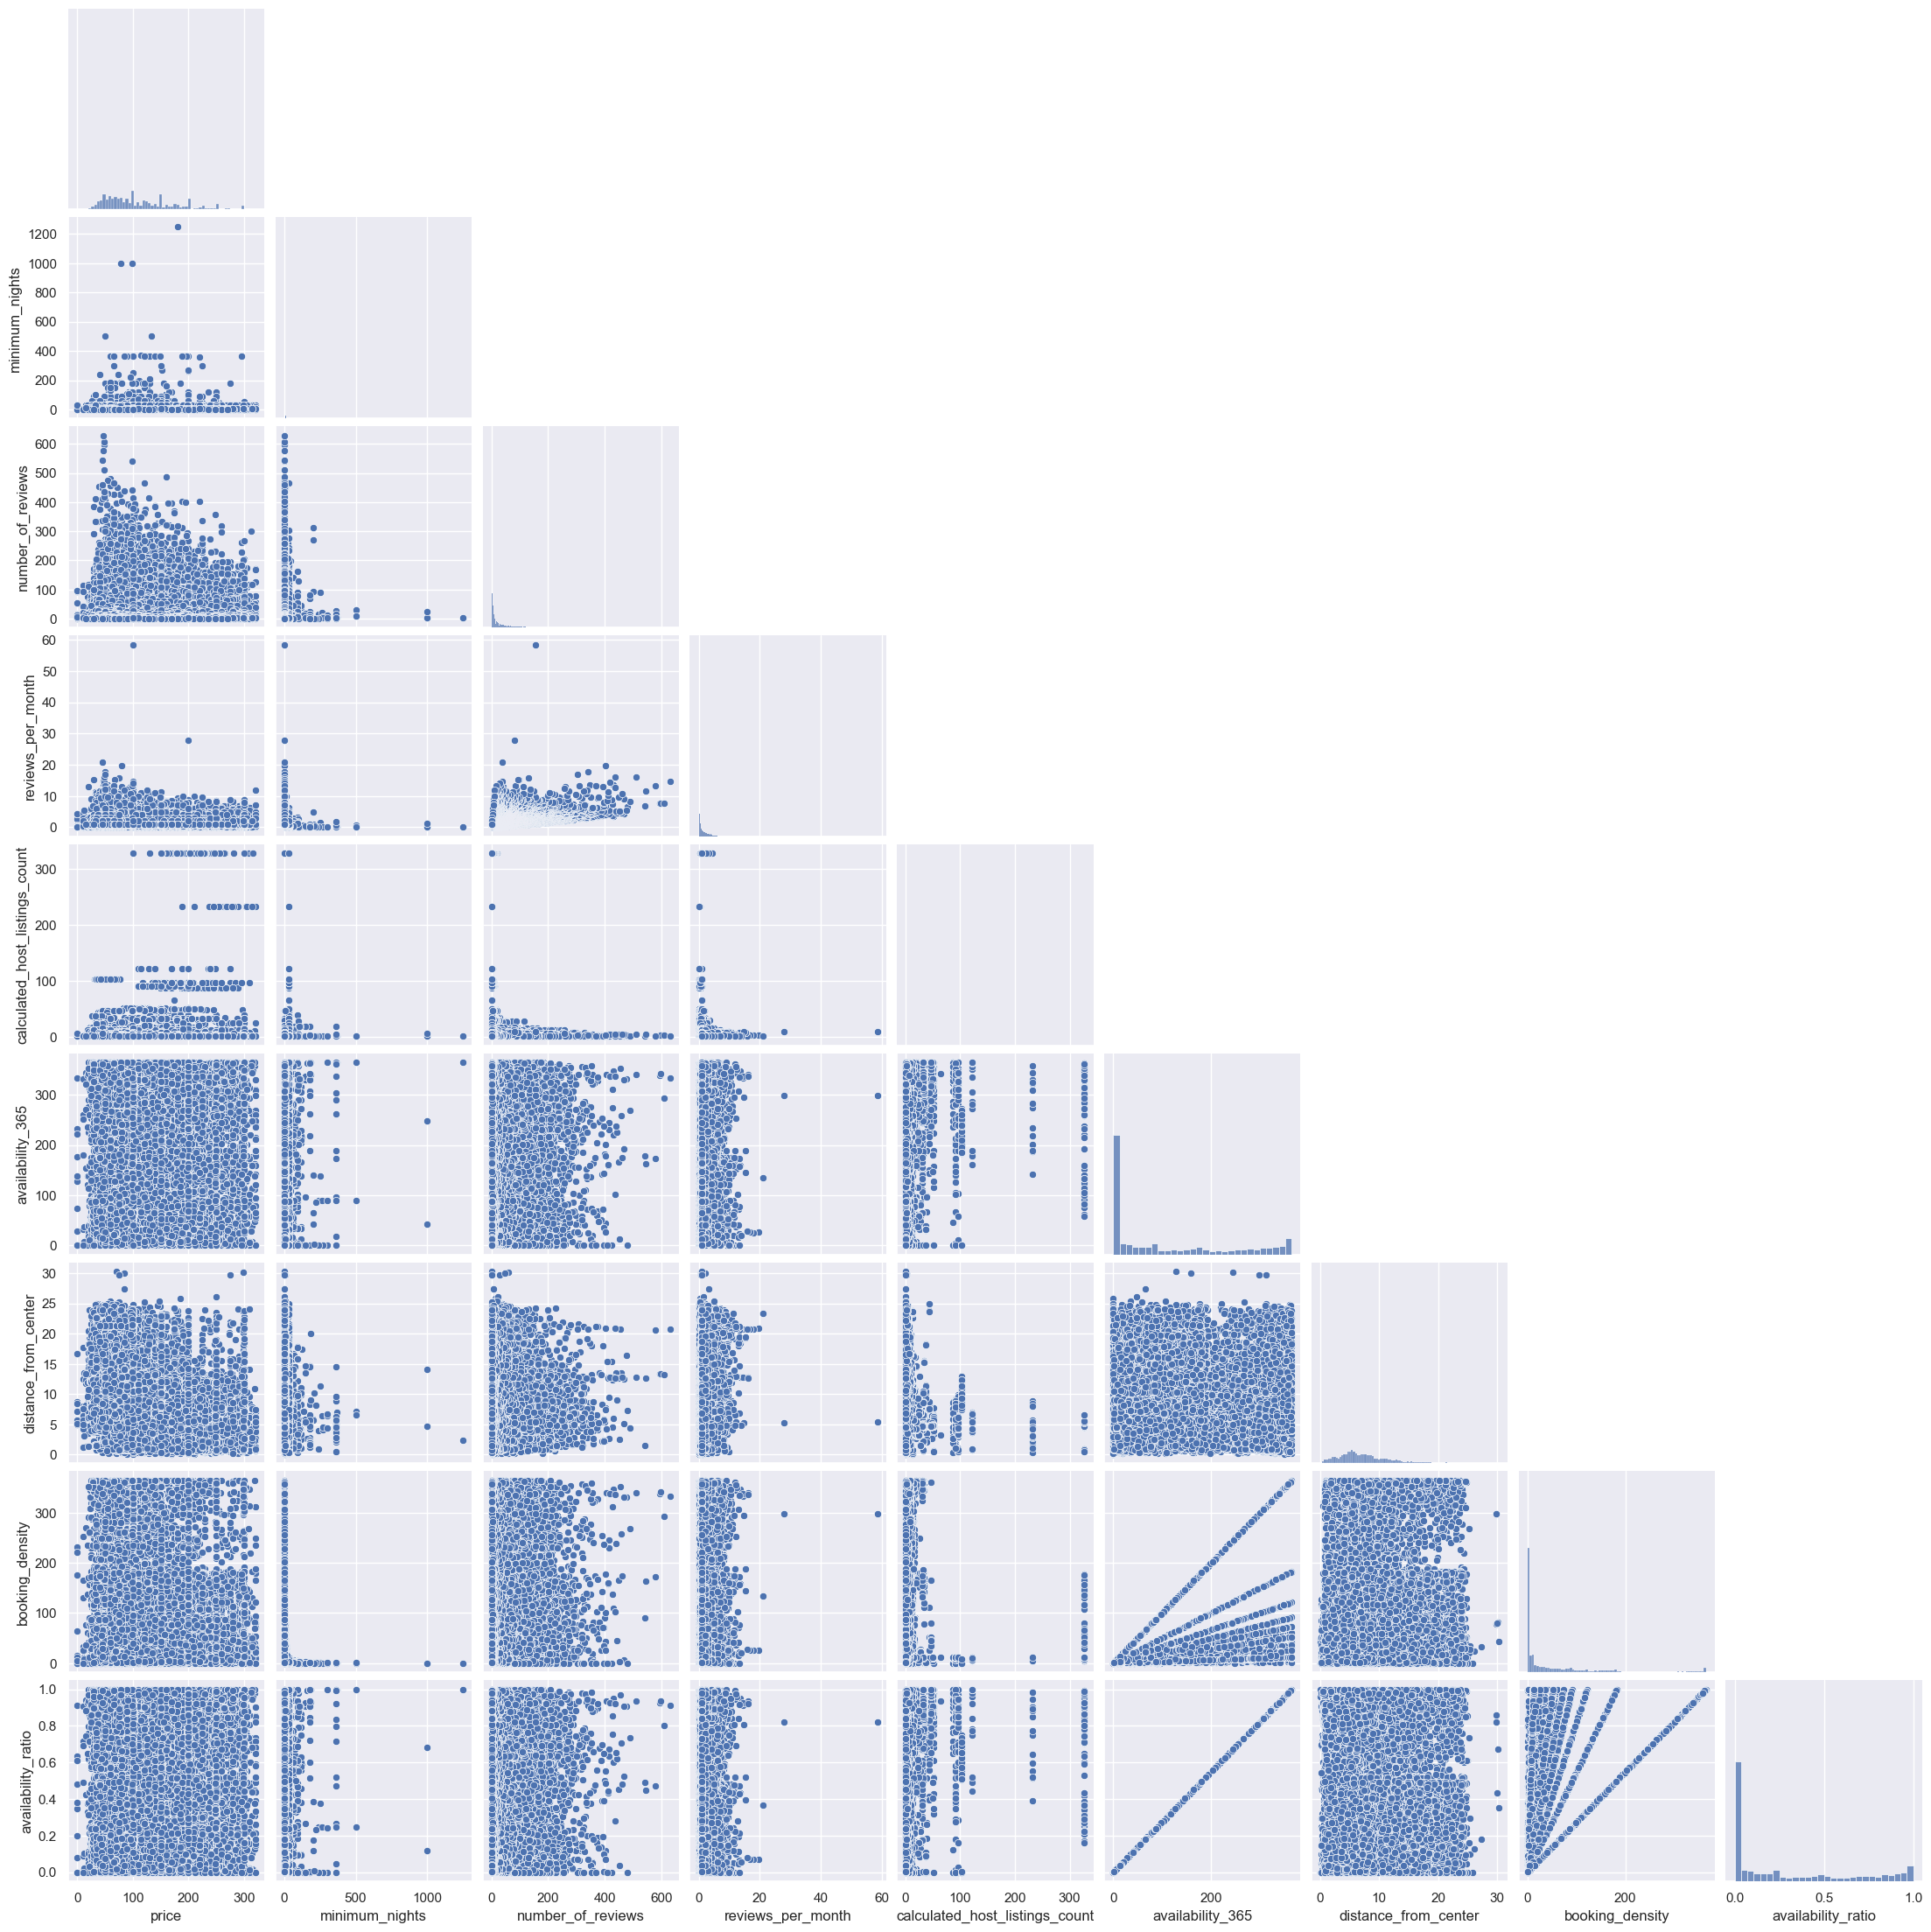

In [91]:
sb.pairplot(data = numerical_cols, corner = True)

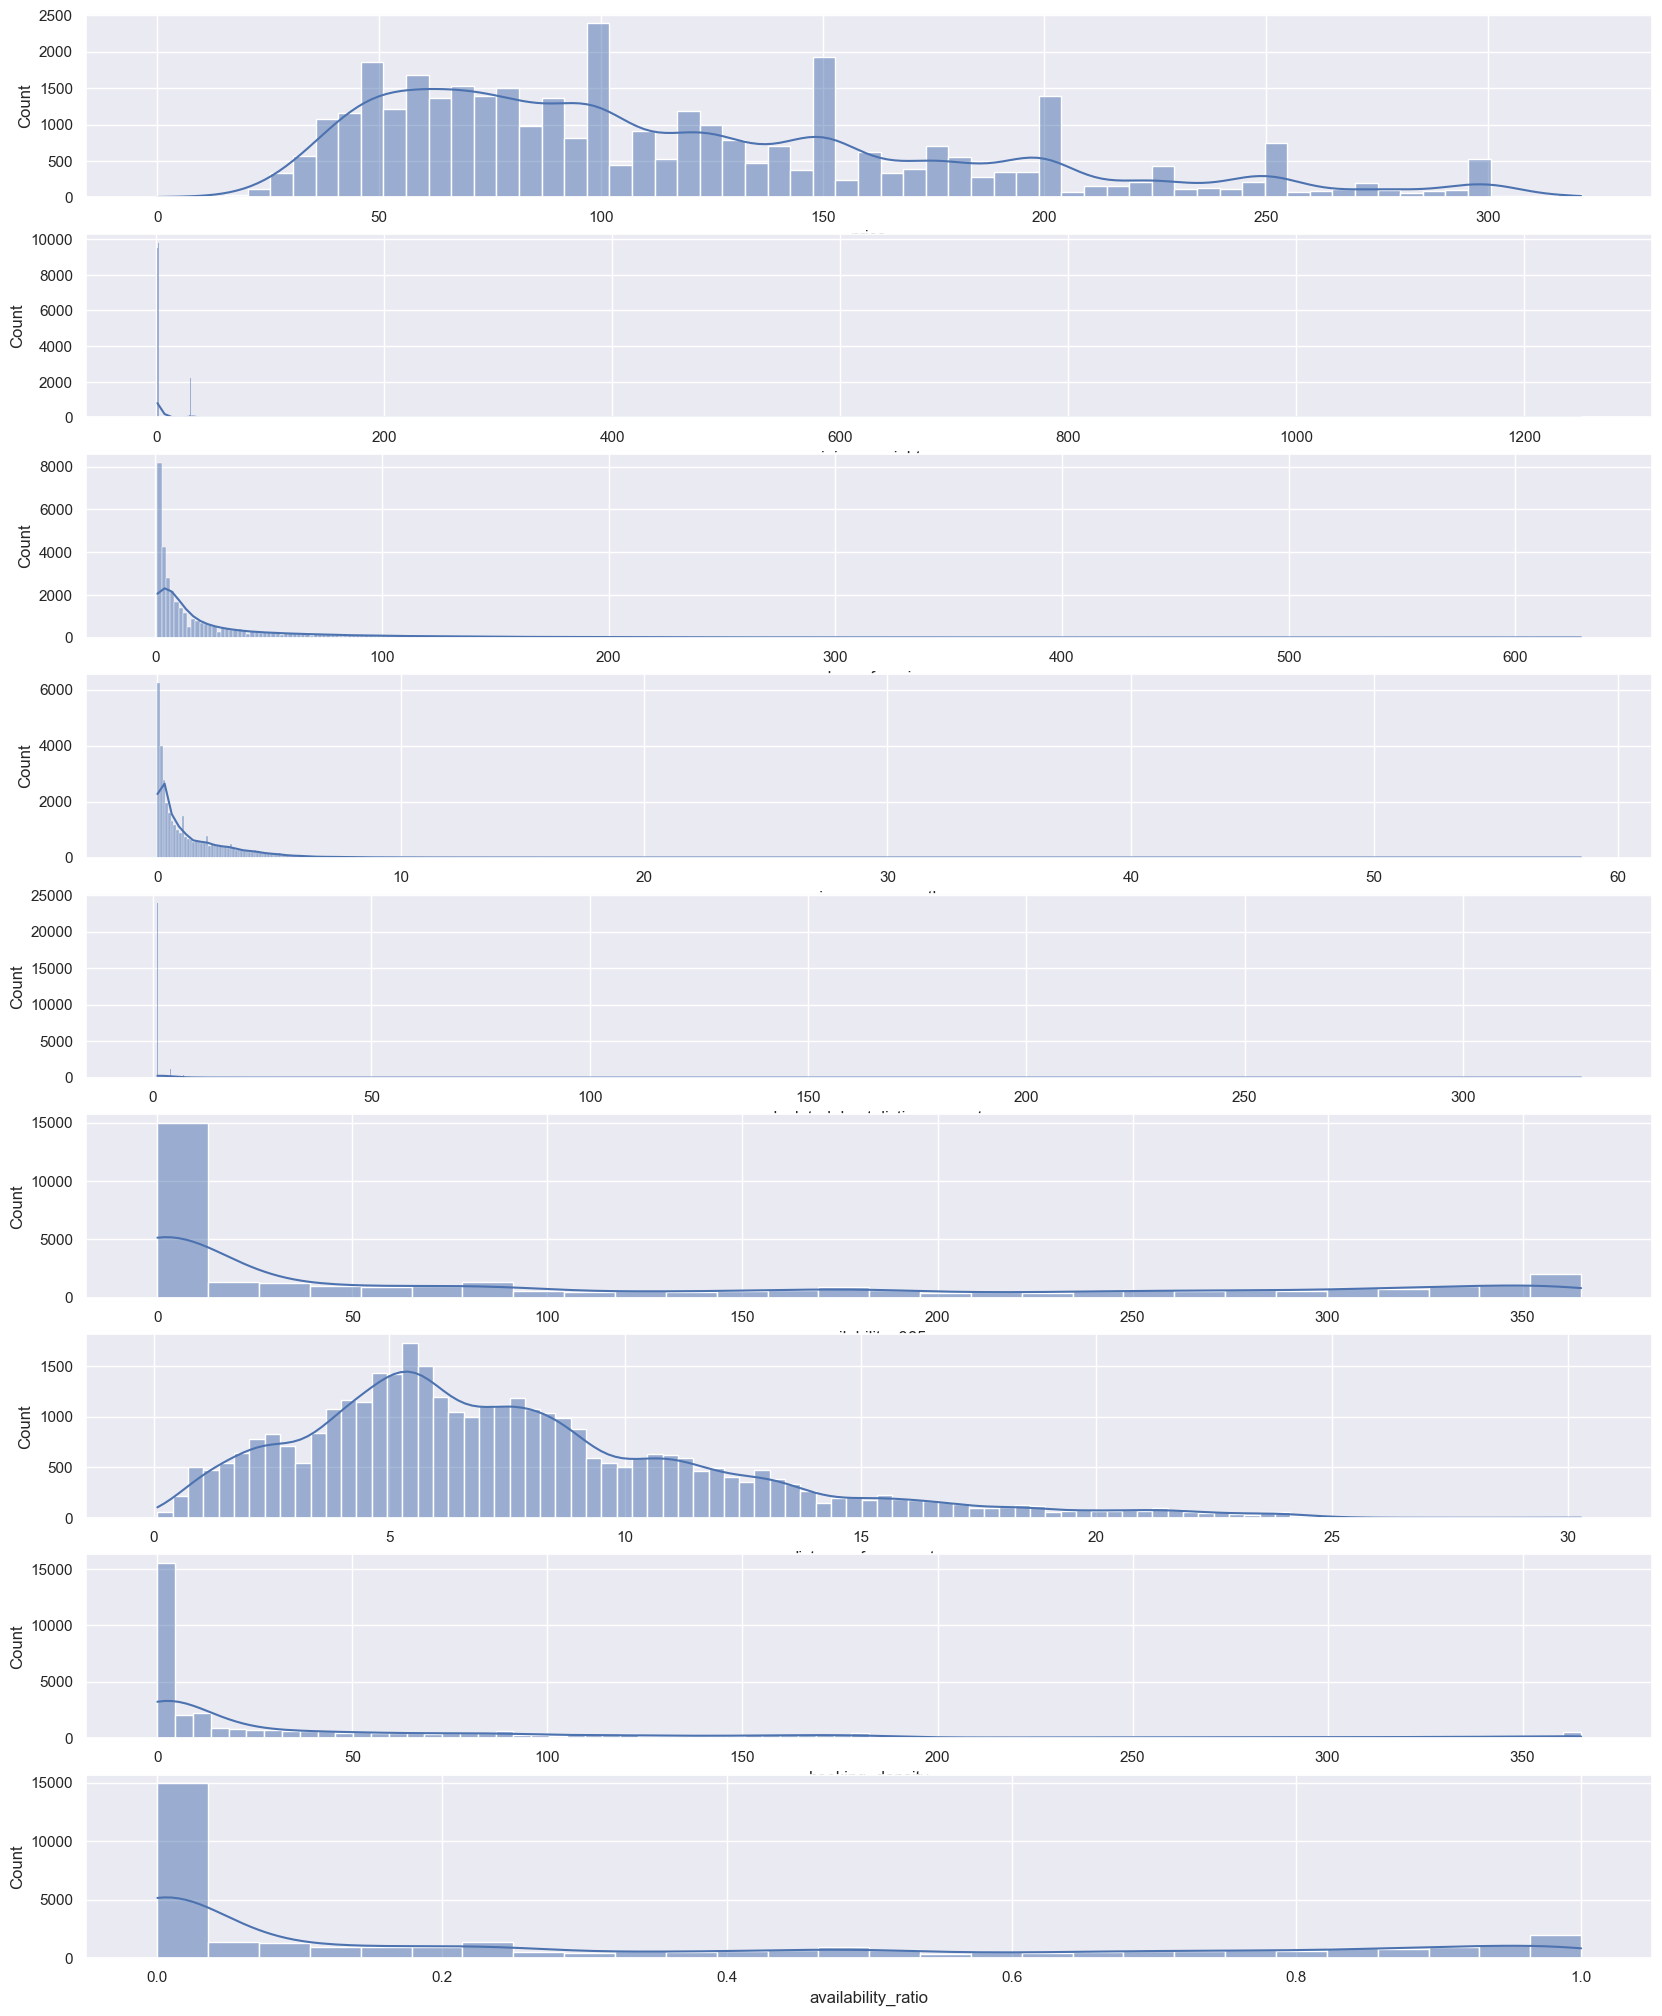

In [93]:
count = 0
f,axes = plt.subplots(9,1,figsize=(18,24))
for var in numerical_cols:
    sb.histplot(data = numerical_cols[var],kde=True, ax = axes[count])
    count+=1

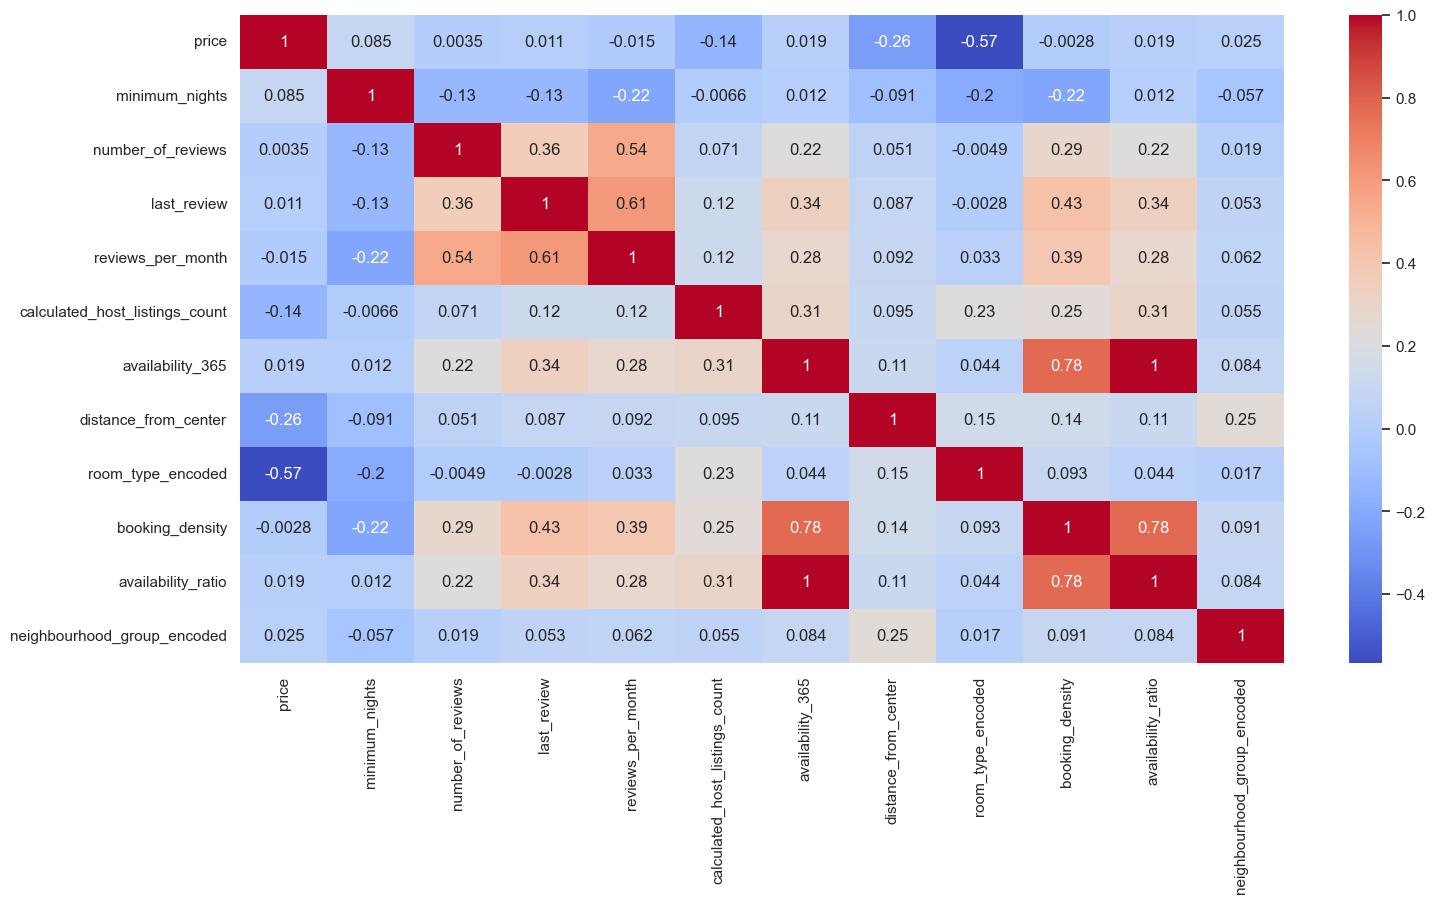

In [95]:
heatmap = sample[['price', 'minimum_nights', 'number_of_reviews',
                  'last_review', 'reviews_per_month', 'calculated_host_listings_count',
                  'availability_365', 'distance_from_center', 'room_type_encoded',
                  'booking_density', 'availability_ratio', 'neighbourhood_group_encoded']]

# Compute correlation matrix
corr = heatmap.corr(method='kendall')

# Plot heatmap
plt.figure(figsize=(15,8))
sb.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

## Categorical data visualization

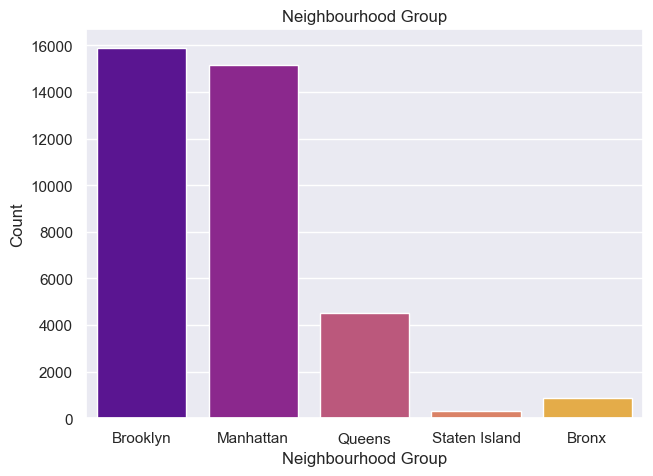

In [96]:
sb.countplot(data=sample, x='neighbourhood_group', palette="plasma")
plt.title('Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.show()

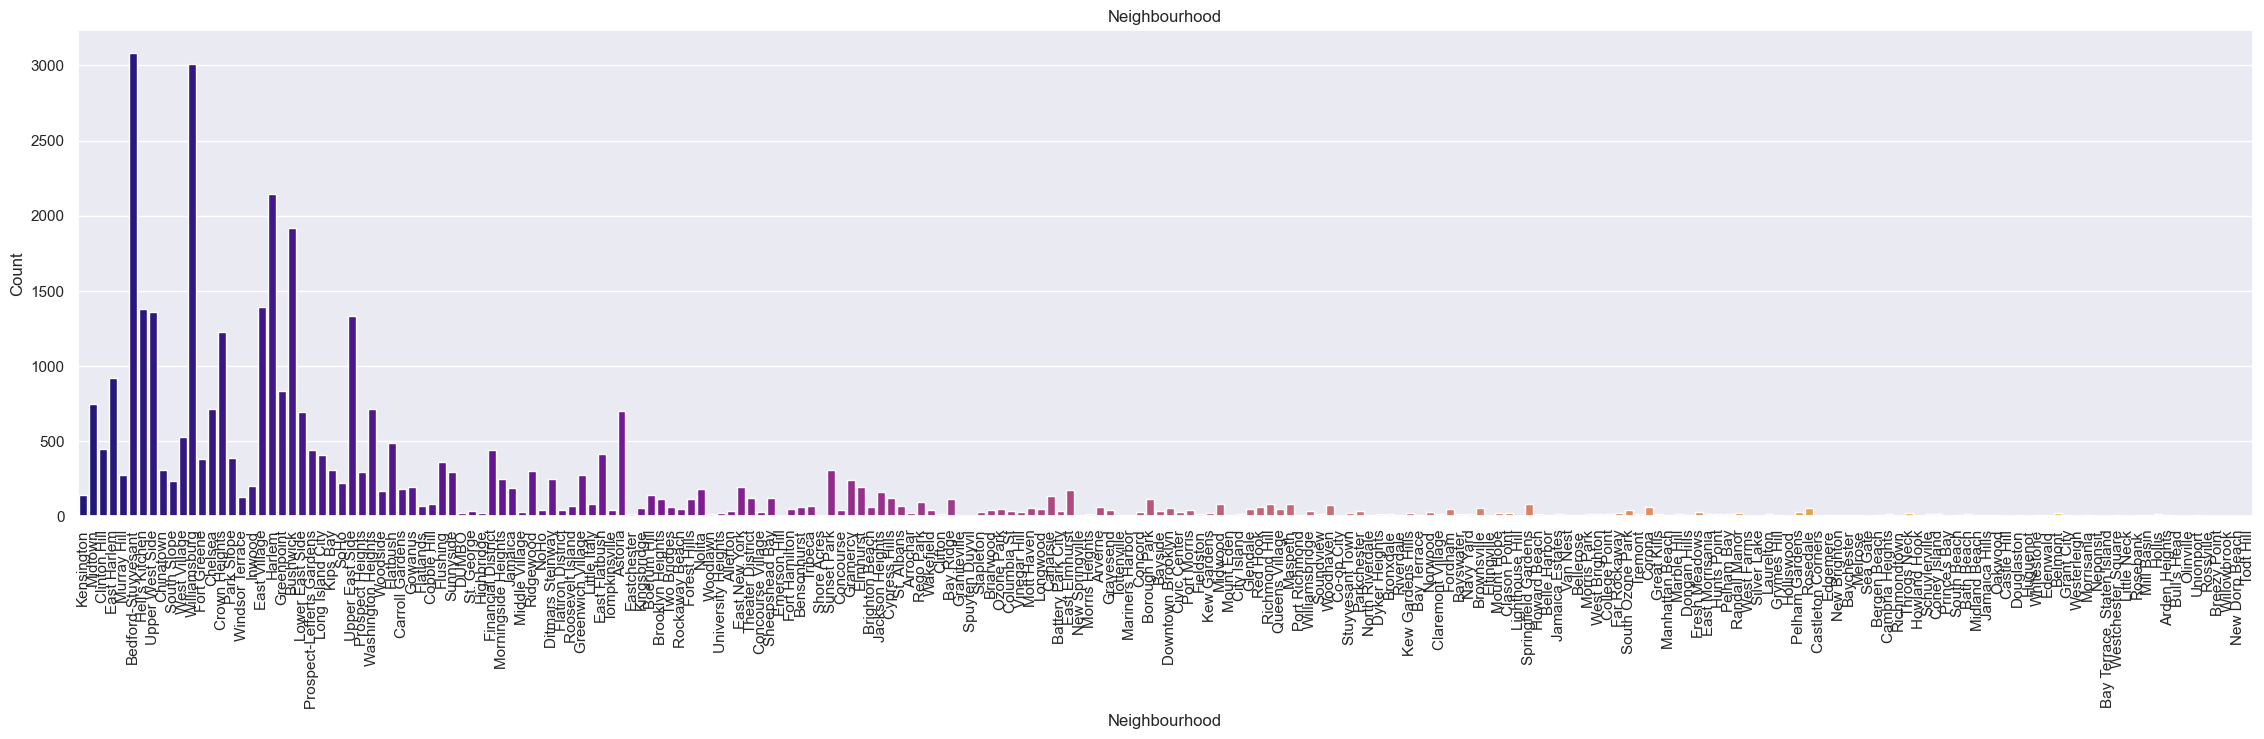

In [97]:
plt.figure(figsize=(25,6))
sb.countplot(data=sample, x='neighbourhood', palette="plasma")
plt.title('Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

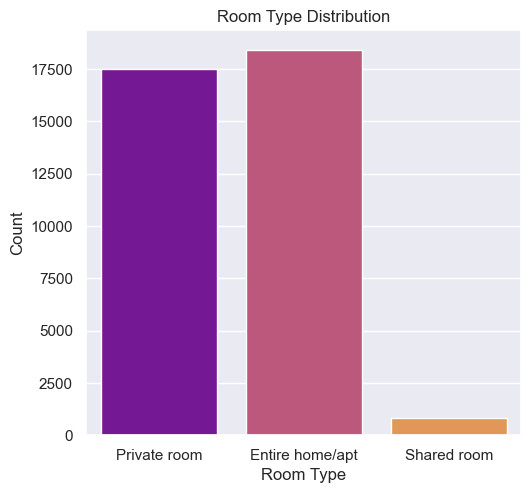

In [98]:
plt.figure(figsize=(5,5))
sb.countplot(data=sample, x='room_type', palette="plasma")
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

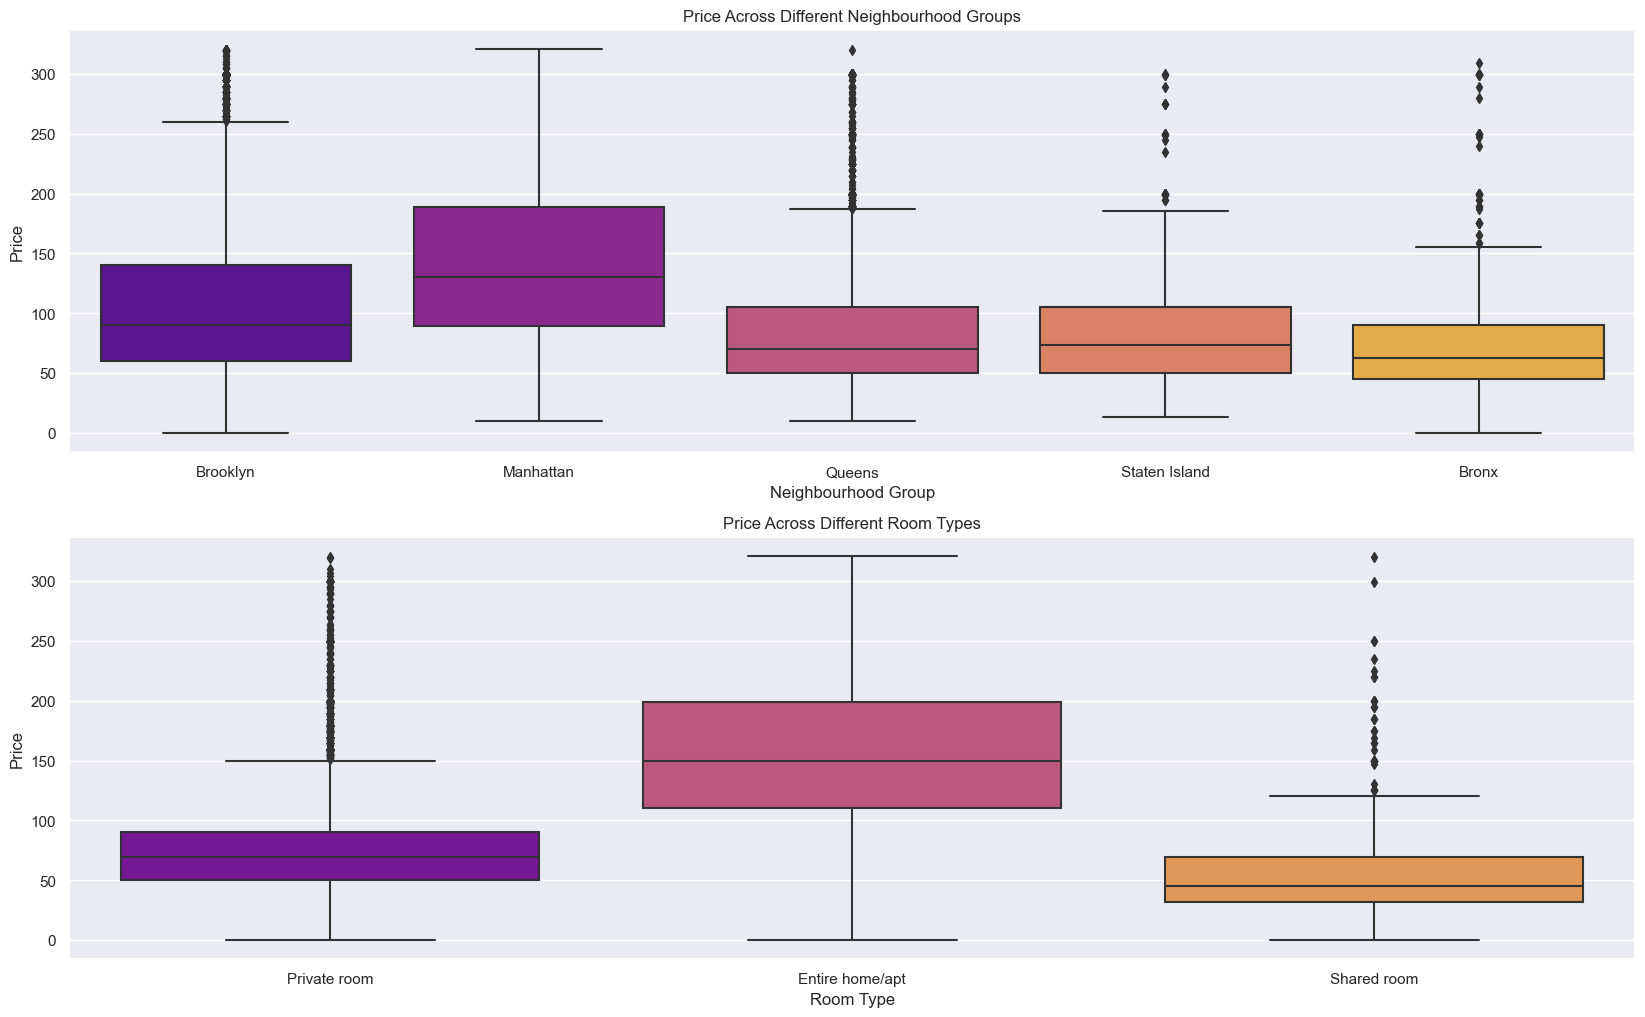

In [101]:
# First set of boxplots
plt.figure(figsize=(18, 24))
# 'neighbourhood_group' boxplot
plt.subplot(4, 1, 1)
sb.boxplot(x='neighbourhood_group', y='price', data=sample, palette='plasma')
plt.title('Price Across Different Neighbourhood Groups')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
# 'room_type' boxplot
plt.subplot(4, 1, 2)
sb.boxplot(x='room_type', y='price', data=sample, palette='plasma')
plt.title('Price Across Different Room Types')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

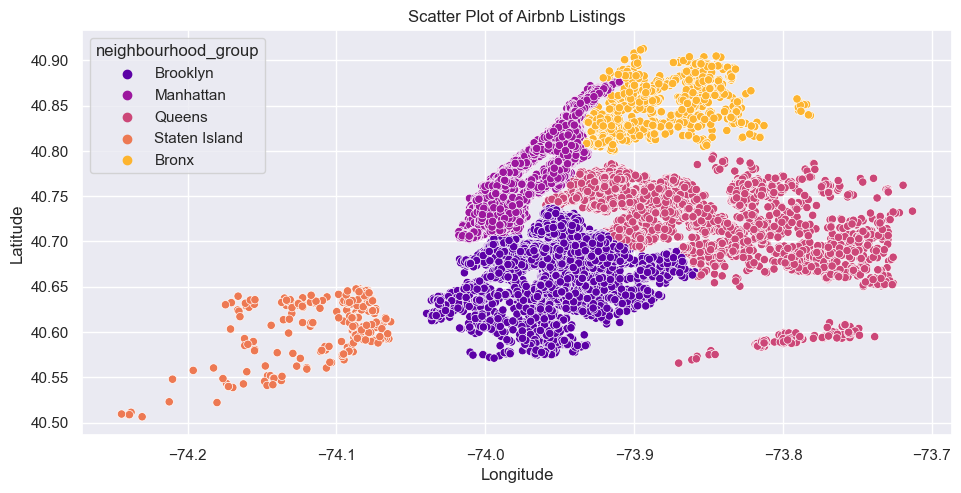

In [102]:
plt.figure(figsize=(10,5))
sb.scatterplot(x=sample['longitude'], y=sample['latitude'], hue=sample['neighbourhood_group'], palette='plasma')
plt.title('Scatter Plot of Airbnb Listings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()